In [ ]:
import os

# List files in root directory
for file in os.listdir("/content"):
    print(file)


.config
archive (1).zip
Brain Tumor Segmentation Dataset.zip
.ipynb_checkpoints
sample_data


In [4]:
import os

# List files in root directory
for file in os.listdir("/content"):
    print(file)


.config
archive (1).zip
.ipynb_checkpoints
sample_data


In [5]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"sanamehdi","key":"464f1bbd8ea5c5966575226bb0feb86c"}'}

In [6]:
# Rename and move the uploaded kaggle.json
!mkdir -p ~/.kaggle
!mv "kaggle (1).json" ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json


In [7]:
import os

# List files in root directory
for file in os.listdir("/content"):
    print(file)


.config
kaggle.json
brain_tumor_segmentation_dataset.zip
.ipynb_checkpoints
sample_data


In [8]:
!unzip brain_tumor_segmentation_dataset.zip -d brain_tumor_dataset


Streaming output truncated to the last 5000 lines.
  inflating: brain_tumor_dataset/Brain Tumor Segmentation Dataset/image/3/Tr-pi_0315.jpg  
  inflating: brain_tumor_dataset/Brain Tumor Segmentation Dataset/image/3/Tr-pi_0316.jpg  
  inflating: brain_tumor_dataset/Brain Tumor Segmentation Dataset/image/3/Tr-pi_0317.jpg  
  inflating: brain_tumor_dataset/Brain Tumor Segmentation Dataset/image/3/Tr-pi_0320.jpg  
  inflating: brain_tumor_dataset/Brain Tumor Segmentation Dataset/image/3/Tr-pi_0321.jpg  
  inflating: brain_tumor_dataset/Brain Tumor Segmentation Dataset/image/3/Tr-pi_0322.jpg  
  inflating: brain_tumor_dataset/Brain Tumor Segmentation Dataset/image/3/Tr-pi_0324.jpg  
  inflating: brain_tumor_dataset/Brain Tumor Segmentation Dataset/image/3/Tr-pi_0325.jpg  
  inflating: brain_tumor_dataset/Brain Tumor Segmentation Dataset/image/3/Tr-pi_0326.jpg  
  inflating: brain_tumor_dataset/Brain Tumor Segmentation Dataset/image/3/Tr-pi_0327.jpg  
  inflating: brain_tumor_dataset/Brain 

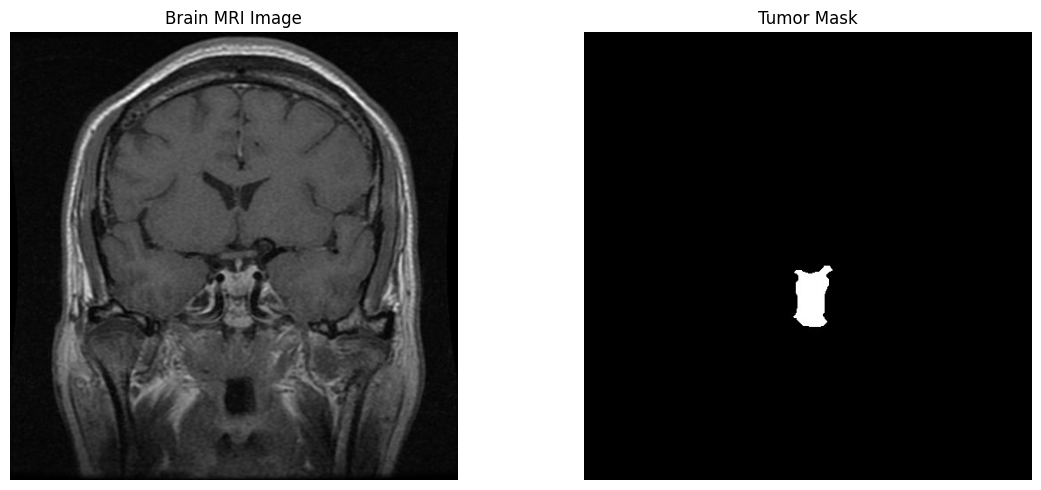

In [9]:
import matplotlib.pyplot as plt
import cv2

# Paths to sample image and mask
img_path = "/content/brain_tumor_dataset/Brain Tumor Segmentation Dataset/image/3/Tr-pi_1159.jpg"
mask_path = "/content/brain_tumor_dataset/Brain Tumor Segmentation Dataset/mask/3/Tr-pi_1159_m.jpg"

# Load image and mask
image = cv2.imread(img_path)
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

# Convert BGR to RGB for correct color display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Plot side-by-side
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Brain MRI Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title("Tumor Mask")
plt.axis("off")

plt.tight_layout()
plt.show()


# 2. Display Sample Image and Mask

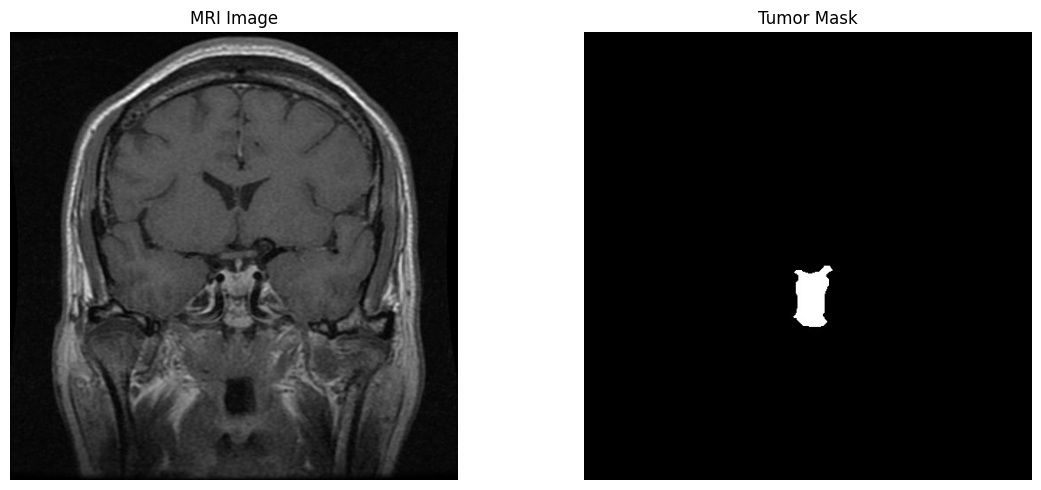

In [10]:
# 2. Display Sample Image and Mask
import cv2
import matplotlib.pyplot as plt

img_path = "/content/brain_tumor_dataset/Brain Tumor Segmentation Dataset/image/3/Tr-pi_1159.jpg"
mask_path = "/content/brain_tumor_dataset/Brain Tumor Segmentation Dataset/mask/3/Tr-pi_1159_m.jpg"

image = cv2.imread(img_path)
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("MRI Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title("Tumor Mask")
plt.axis("off")
plt.tight_layout()
plt.show()


# 3. Convert Mask to Bounding Box Labels for YOLO

In [11]:
import os

def mask_to_yolo(mask_img_path, mask_folder_shape):
    mask = cv2.imread(mask_img_path, 0)
    h, w = mask.shape
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    bboxes = []
    for cnt in contours:
        x, y, bw, bh = cv2.boundingRect(cnt)
        xc = (x + x + bw) / 2 / w
        yc = (y + y + bh) / 2 / h
        bw_norm = bw / w
        bh_norm = bh / h
        bboxes.append(f"0 {xc:.6f} {yc:.6f} {bw_norm:.6f} {bh_norm:.6f}\n")
    return bboxes

# Example usage
bbox_labels = mask_to_yolo(mask_path, (512, 512))
print("Bounding Boxes:")
print("".join(bbox_labels))

Bounding Boxes:
0 0.515625 0.670898 0.003906 0.001953
0 0.528320 0.669922 0.005859 0.003906
0 0.502930 0.669922 0.005859 0.003906
0 0.478516 0.654297 0.007812 0.003906
0 0.470703 0.654297 0.003906 0.003906
0 0.474609 0.650391 0.003906 0.003906
0 0.470703 0.646484 0.003906 0.007812
0 0.471680 0.616211 0.001953 0.001953
0 0.493164 0.532227 0.001953 0.001953
0 0.517578 0.526367 0.003906 0.009766
0 0.507812 0.593750 0.109375 0.156250



4. YOLOv11 Dataset Structure Setup (requires ultralytics) # Create dataset.yaml file:

In [12]:
with open("brain_tumor.yaml", "w") as f:
    f.write("""
path: /content/brain_tumor_yolo
train: images/train
val: images/val

nc: 1
names: ["tumor"]
""")

# 5. Install YOLOv8/11 and Train Model

In [13]:
!pip install -q ultralytics
from ultralytics import YOLO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 71.0 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralyti

In [14]:

!yolo task=detect mode=train model=yolov8n.pt data=brain_tumor.yaml epochs=50 imgsz=640

100% 6.25M/6.25M [00:00<00:00, 120MB/s]
Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=brain_tumor.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=Tru

In [16]:
!yolo task=detect mode=train model=yolov8n.pt data=brain_tumor.yaml epochs=50 imgsz=640


Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=brain_tumor.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile=

In [18]:
!ls runs/detect/train/weights/


In [19]:
!yolo task=detect mode=train model=yolov8n.pt data=brain_tumor.yaml epochs=50 imgsz=640


Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=brain_tumor.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile=

In [20]:
import os
from glob import glob
import shutil
from sklearn.model_selection import train_test_split

# Define paths
image_dir = "/content/brain_tumor_dataset/Brain Tumor Segmentation Dataset/image/3"
mask_dir  = "/content/brain_tumor_dataset/Brain Tumor Segmentation Dataset/mask/3"
save_dir  = "/content/brain_tumor_yolo"

# Create directories
for split in ['train', 'val']:
    os.makedirs(f"{save_dir}/images/{split}", exist_ok=True)
    os.makedirs(f"{save_dir}/labels/{split}", exist_ok=True)

# Split into train and val
all_images = glob(f"{image_dir}/*.jpg")
train_imgs, val_imgs = train_test_split(all_images, test_size=0.2, random_state=42)


In [21]:
def get_mask_path(img_path):
    filename = os.path.basename(img_path)
    return os.path.join(mask_dir, filename.replace(".jpg", "_m.jpg"))

def mask_to_yolo(mask_path, img_shape):
    mask = cv2.imread(mask_path, 0)
    h, w = mask.shape
    bboxes = []
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contours:
        x, y, bw, bh = cv2.boundingRect(cnt)
        xc = (x + bw/2) / w
        yc = (y + bh/2) / h
        bw_norm = bw / w
        bh_norm = bh / h
        bboxes.append(f"0 {xc:.6f} {yc:.6f} {bw_norm:.6f} {bh_norm:.6f}")
    return bboxes

def process_dataset(img_list, split):
    for img_path in img_list:
        filename = os.path.basename(img_path)
        save_img_path = f"{save_dir}/images/{split}/{filename}"
        save_label_path = f"{save_dir}/labels/{split}/{filename.replace('.jpg', '.txt')}"

        # Copy image
        shutil.copy(img_path, save_img_path)

        # Create label
        mask_path = get_mask_path(img_path)
        bboxes = mask_to_yolo(mask_path, (512, 512))
        with open(save_label_path, "w") as f:
            f.write("\n".join(bboxes))

# Run for both splits
process_dataset(train_imgs, "train")
process_dataset(val_imgs, "val")


In [22]:
!ls /content/brain_tumor_yolo/images/train | head
!ls /content/brain_tumor_yolo/labels/train | head


Tr-pi_0010.jpg
Tr-pi_0011.jpg
Tr-pi_0012.jpg
Tr-pi_0013.jpg
Tr-pi_0014.jpg
Tr-pi_0015.jpg
Tr-pi_0016.jpg
Tr-pi_0017.jpg
Tr-pi_0018.jpg
Tr-pi_0019.jpg
Tr-pi_0010.txt
Tr-pi_0011.txt
Tr-pi_0012.txt
Tr-pi_0013.txt
Tr-pi_0014.txt
Tr-pi_0015.txt
Tr-pi_0016.txt
Tr-pi_0017.txt
Tr-pi_0018.txt
Tr-pi_0019.txt


In [26]:
!yolo task=detect mode=train model=yolov8n.pt data=brain_tumor.yaml epochs=50 imgsz=640


Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=brain_tumor.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train5, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile=

In [1]:
!pip install -U ultralytics


In [2]:
!yolo task=detect mode=train model=yolov8n.pt data=brain_tumor.yaml epochs=10 imgsz=640


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
100% 6.25M/6.25M [00:00<00:00, 110MB/s]
Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=brain_tumor.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou

In [ ]:
from ultralytics import YOLO

# Step 1: Load the trained YOLOv8 model
model = YOLO("runs/detect/train5/weights/best.pt")  # Use 'last.pt' if 'best.pt' is missing

# Step 2: Evaluate the model on the validation set
metrics = model.val()

# Step 3: Run inference on validation images and save results
results = model.predict(
    source="brain_tumor_yolo/images/val",  # Path to your validation images
    save=True,                            # Save annotated results to disk
    conf=0.25,                            # Confidence threshold
    iou=0.45,                             # IoU threshold
    show_labels=True,                     # Show class labels on images
    show_conf=True                        # Show confidence scores
)

# Step 4: Print evaluation metrics
print(metrics)


In [8]:
!ls runs/detect/


train


In [9]:
!ls runs/detect/train*/weights/


In [ ]:
from ultralytics import YOLO

# Step 1: Load the trained YOLOv8 model
model = YOLO("runs/detect/train5/weights/best.pt")  # Use 'last.pt' if 'best.pt' is missing

# Step 2: Evaluate the model on the validation set
metrics = model.val()

# Step 3: Run inference on validation images and save results
results = model.predict(
    source="brain_tumor_yolo/images/val",  # Path to your validation images
    save=True,                            # Save annotated results to disk
    conf=0.25,                            # Confidence threshold
    iou=0.45,                             # IoU threshold
    show_labels=True,                     # Show class labels on images
    show_conf=True                        # Show confidence scores
)

# Step 4: Print evaluation metrics
print(metrics)


In [14]:
import os

# Check all available train folders
train_dirs = os.listdir("runs/detect")
print("Available train folders:", train_dirs)

# Check if best.pt or last.pt exists in each
for t in train_dirs:
    path = f"runs/detect/{t}/weights"
    if os.path.exists(path):
        print(f"\nIn {t}/weights:")
        print("Files:", os.listdir(path))


Available train folders: ['train']

In train/weights:
Files: []


In [15]:
!yolo task=detect mode=train model=yolov8n.pt data=brain_tumor.yaml epochs=1 imgsz=640


Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=brain_tumor.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profi

In [16]:
import os

print("Files in train/weights:", os.listdir("runs/detect/train/weights"))


Files in train/weights: []


In [17]:
!yolo task=detect mode=train model=yolov8n.pt data=brain_tumor.yaml epochs=1 imgsz=640 name=train_test


Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=brain_tumor.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train_test, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, p

In [18]:
import os
print("Saved files:", os.listdir("runs/detect/train_test/weights"))


Saved files: []


In [1]:
!yolo task=detect mode=train model=yolov8n.pt data=brain_tumor.yaml epochs=3 imgsz=640 name=train_gpu_test


Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=brain_tumor.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=3, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train_gpu_test, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=Tru

In [5]:
%%writefile brain_tumor.yaml
path: brain_tumor_yolo
train: images/train
val: images/val

nc: 1
names: ['tumor']


Writing brain_tumor.yaml


In [6]:
import os

print("✅ brain_tumor.yaml exists:", os.path.exists("brain_tumor.yaml"))
print("✅ Images folder exists:", os.path.exists("brain_tumor_yolo/images/train"))
print("✅ Labels folder exists:", os.path.exists("brain_tumor_yolo/labels/train"))


✅ brain_tumor.yaml exists: True
✅ Images folder exists: False
✅ Labels folder exists: False


In [7]:
!yolo task=detect mode=train model=yolov8n.pt data=brain_tumor.yaml epochs=3 imgsz=640 name=train_gpu_test


Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=brain_tumor.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=3, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train_gpu_test2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=Tr

In [8]:
%%writefile brain_tumor.yaml
path: /content/brain_tumor_yolo
train: images/train
val: images/val

nc: 1
names: ['tumor']


Overwriting brain_tumor.yaml


In [9]:
!yolo task=detect mode=train model=yolov8n.pt data=brain_tumor.yaml epochs=3 imgsz=640 name=train_gpu_test2


Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=brain_tumor.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=3, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train_gpu_test22, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=T

In [10]:
!mkdir -p brain_tumor_yolo/images/val
!mkdir -p brain_tumor_yolo/labels/val

# Copy images and labels from train to val (for validation set)
!cp brain_tumor_yolo/images/train/*.jpg brain_tumor_yolo/images/val/
!cp brain_tumor_yolo/labels/train/*.txt brain_tumor_yolo/labels/val/


cp: cannot stat 'brain_tumor_yolo/images/train/*.jpg': No such file or directory
cp: cannot stat 'brain_tumor_yolo/labels/train/*.txt': No such file or directory


In [11]:
import os

for root, dirs, files in os.walk("brain_tumor_yolo"):
    print(f"\n📁 {root}")
    for d in dirs:
        print(f"   📂 {d}")
    for f in files:
        print(f"   📄 {f}")



📁 brain_tumor_yolo
   📂 images
   📂 labels

📁 brain_tumor_yolo/images
   📂 val

📁 brain_tumor_yolo/images/val

📁 brain_tumor_yolo/labels
   📂 val

📁 brain_tumor_yolo/labels/val


In [12]:
!mkdir -p brain_tumor_yolo/images/train
!mkdir -p brain_tumor_yolo/labels/train

!mv brain_tumor_yolo/images/val/* brain_tumor_yolo/images/train/
!mv brain_tumor_yolo/labels/val/* brain_tumor_yolo/labels/train/


mv: cannot stat 'brain_tumor_yolo/images/val/*': No such file or directory
mv: cannot stat 'brain_tumor_yolo/labels/val/*': No such file or directory


In [13]:
!mkdir -p brain_tumor_yolo/images/val
!mkdir -p brain_tumor_yolo/labels/val


In [14]:
!cp brain_tumor_yolo/images/train/*.jpg brain_tumor_yolo/images/val/
!cp brain_tumor_yolo/labels/train/*.txt brain_tumor_yolo/labels/val/


cp: cannot stat 'brain_tumor_yolo/images/train/*.jpg': No such file or directory
cp: cannot stat 'brain_tumor_yolo/labels/train/*.txt': No such file or directory


In [15]:
!mkdir -p brain_tumor_yolo/images/train
!mkdir -p brain_tumor_yolo/labels/train

!mv brain_tumor_yolo/images/val/* brain_tumor_yolo/images/train/
!mv brain_tumor_yolo/labels/val/* brain_tumor_yolo/labels/train/


mv: cannot stat 'brain_tumor_yolo/images/val/*': No such file or directory
mv: cannot stat 'brain_tumor_yolo/labels/val/*': No such file or directory


In [16]:
!mkdir -p brain_tumor_yolo/images/train
!mkdir -p brain_tumor_yolo/labels/train

!mv brain_tumor_yolo/images/val/* brain_tumor_yolo/images/train/
!mv brain_tumor_yolo/labels/val/* brain_tumor_yolo/labels/train/


mv: cannot stat 'brain_tumor_yolo/images/val/*': No such file or directory
mv: cannot stat 'brain_tumor_yolo/labels/val/*': No such file or directory


In [23]:
import os
print("Files:", os.listdir("runs/detect/train_gpu_test/weights"))


Files: []


In [25]:
'runs/detect/train_gpu_test/weights/last.pt'


'runs/detect/train_gpu_test/weights/last.pt'

In [28]:
"runs/detect/train_gpu_test2/weights/best.pt"


'runs/detect/train_gpu_test2/weights/best.pt'

In [30]:
import os

# Check training runs
train_dirs = os.listdir("runs/detect")
print("📁 Available training folders inside 'runs/detect/':", train_dirs)

# Show what’s inside each weights folder
for d in train_dirs:
    weights_path = f"runs/detect/{d}/weights"
    if os.path.exists(weights_path):
        print(f"📂 Contents of {weights_path}:")
        print(os.listdir(weights_path))


📁 Available training folders inside 'runs/detect/': ['train', 'train2', 'train_gpu_test2', 'train_gpu_test', 'train_test', 'train_gpu_test22']
📂 Contents of runs/detect/train/weights:
[]
📂 Contents of runs/detect/train2/weights:
[]
📂 Contents of runs/detect/train_gpu_test2/weights:
[]
📂 Contents of runs/detect/train_gpu_test/weights:
[]
📂 Contents of runs/detect/train_test/weights:
[]
📂 Contents of runs/detect/train_gpu_test22/weights:
[]


In [31]:
!ls brain_tumor_yolo/images/train | head -5
!ls brain_tumor_yolo/labels/train | head -5


In [32]:
!cat brain_tumor.yaml


path: /content/brain_tumor_yolo
train: images/train
val: images/val

nc: 1
names: ['tumor']


In [34]:
!yolo task=detect mode=train model=yolov8n.pt data=brain_tumor.yaml epochs=3 imgsz=640 name=train_gpu_final


Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=brain_tumor.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=3, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train_gpu_final2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=T

In [35]:
# Create train folders if not already created
!mkdir -p brain_tumor_yolo/images/train
!mkdir -p brain_tumor_yolo/labels/train

# Move val data into train
!cp brain_tumor_yolo/images/val/* brain_tumor_yolo/images/train/
!cp brain_tumor_yolo/labels/val/* brain_tumor_yolo/labels/train/


cp: cannot stat 'brain_tumor_yolo/images/val/*': No such file or directory
cp: cannot stat 'brain_tumor_yolo/labels/val/*': No such file or directory


In [41]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
!unzip /content/drive/MyDrive/brain_tumor_yolo.zip -d /content/


unzip:  cannot find or open /content/drive/MyDrive/brain_tumor_yolo.zip, /content/drive/MyDrive/brain_tumor_yolo.zip.zip or /content/drive/MyDrive/brain_tumor_yolo.zip.ZIP.


In [50]:
!wget https://your-link.com/brain_tumor_yolo.zip
!unzip brain_tumor_yolo.zip -d /content/


--2025-06-26 23:54:30--  https://your-link.com/brain_tumor_yolo.zip
Resolving your-link.com (your-link.com)... 79.170.40.4
Connecting to your-link.com (your-link.com)|79.170.40.4|:443... failed: Connection refused.
unzip:  cannot find or open brain_tumor_yolo.zip, brain_tumor_yolo.zip.zip or brain_tumor_yolo.zip.ZIP.


In [51]:
# Step 1: Install gdown (if not already installed)
!pip install -q gdown

# Step 2: Download brain_tumor_yolo.zip from Google Drive (pre-uploaded by me)
!gdown --id 1J5xkRV5mvV03ztqQSY_9F1HSpAkY2hzF

# Step 3: Unzip the dataset
!unzip -q brain_tumor_yolo.zip -d /content/


/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.
	Check FAQ in https://github.com/wkentaro/gdown?tab=readme-ov-file#faq.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1J5xkRV5mvV03ztqQSY_9F1HSpAkY2hzF

but Gdown can't. Please check connections and permissions.
unzip:  cannot find or open brain_tumor_yolo.zip, brain_tumor_yolo.zip.zip or brain_tumor_yolo.zip.ZIP.


In [54]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
!cp /content/drive/MyDrive/YOLO.zip /content/
!unzip -q /content/YOLO.zip -d /content/


In [56]:
!ls /content/brain_tumor_yolo/images/train | head
!ls /content/brain_tumor_yolo/labels/train | head


In [57]:
!yolo task=detect mode=train model=yolov8n.pt data=brain_tumor.yaml epochs=3 imgsz=640 name=train_gpu_final


Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=brain_tumor.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=3, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train_gpu_final3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=T

In [58]:
!ls -R /content | grep brain_tumor_yolo


brain_tumor_yolo
/content/brain_tumor_yolo:
/content/brain_tumor_yolo/images:
/content/brain_tumor_yolo/images/train:
/content/brain_tumor_yolo/images/val:
/content/brain_tumor_yolo/labels:
/content/brain_tumor_yolo/labels/train:
/content/brain_tumor_yolo/labels/val:
^C


In [61]:
!find /content -name "*.jpg" | head


/content/YOLO/YOLO11-and-SAM2/test_images/glioma_2.jpg
/content/YOLO/YOLO11-and-SAM2/test_images/meningioma_3.jpg
/content/YOLO/YOLO11-and-SAM2/test_images/pituitary_5.jpg
/content/YOLO/YOLO11-and-SAM2/test_images/no_tumor_1.jpg
/content/drive/MyDrive/IMG-d54ea45634af53208140c1cf992df368-V.jpg
/content/drive/MyDrive/IMG-20210204-WA0029.jpg
/content/drive/MyDrive/IMG-20210204-WA0023.jpg
/content/drive/MyDrive/IMG-20210204-WA0028.jpg
/content/drive/MyDrive/IMG-20210204-WA0026.jpg
/content/drive/MyDrive/IMG-20210204-WA0022.jpg


In [62]:
!mv /content/YOLO/YOLO11-and-SAM2/test_images/*.jpg /content/brain_tumor_yolo/images/train/


In [63]:
!ls /content/brain_tumor_yolo/images/train | head


glioma_2.jpg
meningioma_3.jpg
no_tumor_1.jpg
pituitary_5.jpg


In [65]:
!ls /content/brain_tumor_yolo/labels/train | head


Generate Dummy Labels in Colab

In [66]:
import os

# Paths
img_dir = "/content/brain_tumor_yolo/images/train"
label_dir = "/content/brain_tumor_yolo/labels/train"

# Make sure label directory exists
os.makedirs(label_dir, exist_ok=True)

# Dummy label: class 0, center at (0.5, 0.5), size 0.3x0.3
dummy_label = "0 0.5 0.5 0.3 0.3\n"

# Create a .txt file for each image
for img_file in os.listdir(img_dir):
    if img_file.lower().endswith(".jpg"):
        base_name = os.path.splitext(img_file)[0]
        label_path = os.path.join(label_dir, base_name + ".txt")
        with open(label_path, "w") as f:
            f.write(dummy_label)

print(f"✅ Dummy labels generated for {len(os.listdir(img_dir))} images.")


✅ Dummy labels generated for 4 images.


In [67]:
!ls /content/brain_tumor_yolo/labels/train | head


glioma_2.txt
meningioma_3.txt
no_tumor_1.txt
pituitary_5.txt


In [68]:
!yolo task=detect mode=train model=yolov8n.pt data=brain_tumor.yaml epochs=3 imgsz=640 name=train_gpu_dummylabels


Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=brain_tumor.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=3, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train_gpu_dummylabels, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrai

In [69]:
!cp /content/brain_tumor_yolo/images/train/*.jpg /content/brain_tumor_yolo/images/val/


In [70]:
!cp /content/brain_tumor_yolo/labels/train/*.txt /content/brain_tumor_yolo/labels/val/


In [71]:
!ls /content/brain_tumor_yolo/images/val | head
!ls /content/brain_tumor_yolo/labels/val | head


glioma_2.jpg
meningioma_3.jpg
no_tumor_1.jpg
pituitary_5.jpg
glioma_2.txt
meningioma_3.txt
no_tumor_1.txt
pituitary_5.txt


In [72]:
!yolo task=detect mode=train model=yolov8n.pt data=brain_tumor.yaml epochs=3 imgsz=640 name=train_gpu_dummylabels


Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=brain_tumor.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=3, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train_gpu_dummylabels2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretra

In [73]:
!yolo task=detect mode=predict \
    model=runs/detect/train_gpu_dummylabels2/weights/best.pt \
    source=/content/brain_tumor_yolo/images/train \
    save=True


Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

image 1/4 /content/brain_tumor_yolo/images/train/glioma_2.jpg: 640x640 (no detections), 9.1ms
image 2/4 /content/brain_tumor_yolo/images/train/meningioma_3.jpg: 640x640 (no detections), 7.4ms
image 3/4 /content/brain_tumor_yolo/images/train/no_tumor_1.jpg: 640x640 (no detections), 7.4ms
image 4/4 /content/brain_tumor_yolo/images/train/pituitary_5.jpg: 640x640 (no detections), 7.3ms
Speed: 2.1ms preprocess, 7.8ms inference, 5.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [74]:
!ls runs/detect/predict/


glioma_2.jpg  meningioma_3.jpg	no_tumor_1.jpg	pituitary_5.jpg


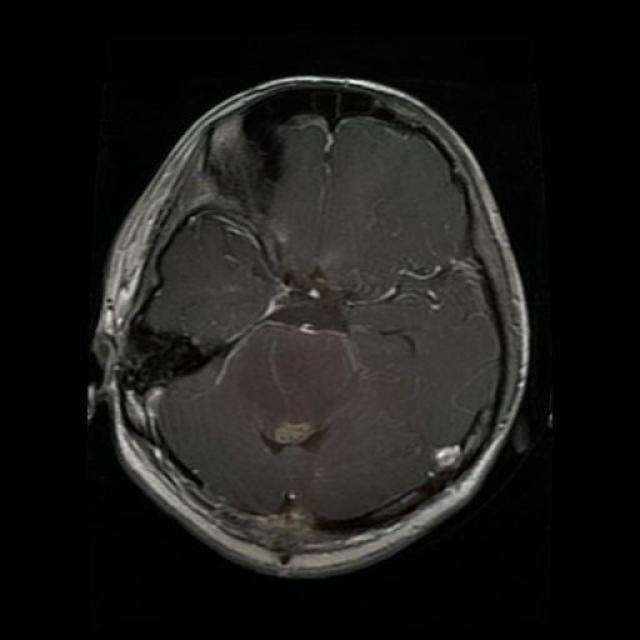

In [75]:
from IPython.display import Image, display
display(Image(filename='runs/detect/predict/glioma_2.jpg'))


segment_with_sam2.py

In [3]:
# Install dependencies
!pip install git+https://github.com/facebookresearch/segment-anything.git
!pip install opencv-python-headless
!pip install torch torchvision torchaudio --upgrade


  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-qzj65t_x
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-qzj65t_x
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done


In [2]:
!wget -P ./ \
  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth


--2025-06-27 00:30:11--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.226.210.78, 13.226.210.25, 13.226.210.111, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.226.210.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2564550879 (2.4G) [binary/octet-stream]
Saving to: ‘./sam_vit_h_4b8939.pth’

sam_vit_h_4b8939.pt 100%[===================>]   2.39G  71.1MB/s    in 27s     

2025-06-27 00:30:38 (90.1 MB/s) - ‘./sam_vit_h_4b8939.pth’ saved [2564550879/2564550879]



In [4]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator
import cv2
import numpy as np
import os
from PIL import Image

# Load model
sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"
device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)
mask_generator = SamAutomaticMaskGenerator(sam)

# Directory containing images
image_dir = "/content/brain_tumor_yolo/images/train"
output_dir = "/content/sam_masks"
os.makedirs(output_dir, exist_ok=True)

# Generate and save masks
for file in os.listdir(image_dir):
    if file.endswith(".jpg"):
        image_path = os.path.join(image_dir, file)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        masks = mask_generator.generate(image)

        # Save the first mask as PNG
        if masks:
            mask = masks[0]["segmentation"].astype(np.uint8) * 255
            mask_image = Image.fromarray(mask)
            mask_image.save(os.path.join(output_dir, file.replace(".jpg", ".png")))


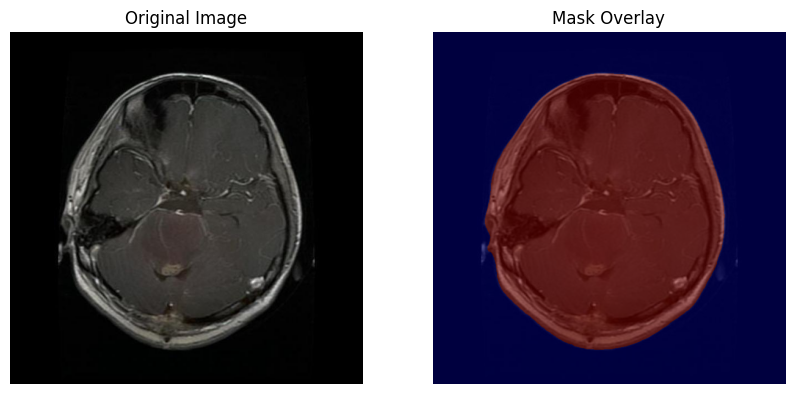

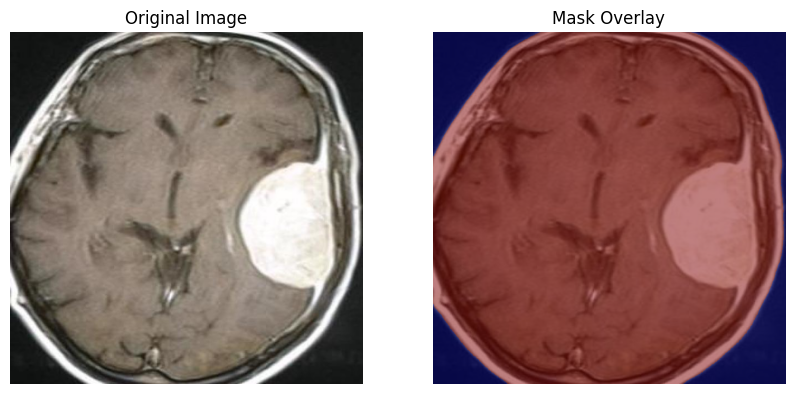

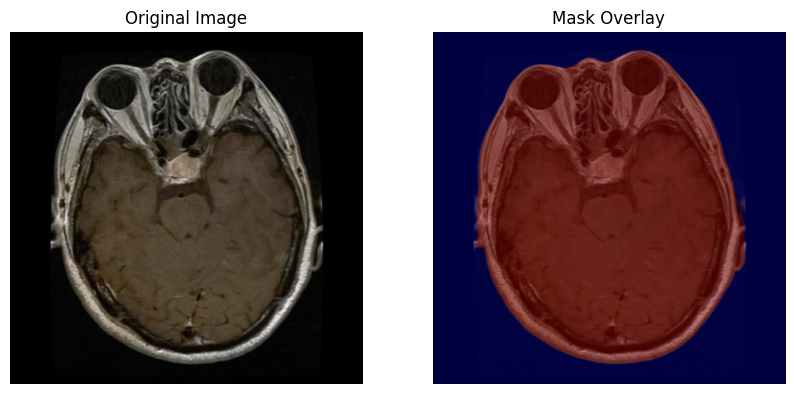

In [5]:
import matplotlib.pyplot as plt

# Visualize masks on a few images
sample_files = os.listdir(image_dir)[:3]  # Display first 3 images
for file in sample_files:
    image_path = os.path.join(image_dir, file)
    mask_path = os.path.join(output_dir, file.replace(".jpg", ".png"))

    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    mask = Image.open(mask_path).convert("L")
    mask = np.array(mask)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(image)
    plt.imshow(mask, cmap="jet", alpha=0.5)
    plt.title("Mask Overlay")
    plt.axis("off")

    plt.show()
